In [2]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
%matplotlib inline 
from glob import glob

In [6]:
female = glob('./Module-2/data/crop/female_crop/*.png')
male = glob('./Module-2/data/crop/male_crop/*.png')

In [8]:
path = male + female

In [9]:
len(path)

490

In [10]:
img = Image.open(path[0])

In [11]:
img.size

(122, 122)

In [22]:
def get_size(path):
    img = Image.open(path)
    return img.size[0]

In [23]:
df = pd.DataFrame(data=path, columns=['path'])

In [24]:
df.head()

,path
0,./Module-2/data/crop/male_crop\male_1.png
1,./Module-2/data/crop/male_crop\male_101.png
2,./Module-2/data/crop/male_crop\male_108.png
3,./Module-2/data/crop/male_crop\male_110.png
4,./Module-2/data/crop/male_crop\male_114.png


In [25]:
df['size'] = df['path'].apply(get_size)

In [26]:
df.head()

,path,size
0,./Module-2/data/crop/male_crop\male_1.png,122
1,./Module-2/data/crop/male_crop\male_101.png,81
2,./Module-2/data/crop/male_crop\male_108.png,81
3,./Module-2/data/crop/male_crop\male_110.png,81
4,./Module-2/data/crop/male_crop\male_114.png,81


In [27]:
#lets explore the data

In [29]:
df.describe()

,size
count,490.000000
mean,158.555102
std,73.662651
min,54.000000
25%,81.000000
50%,122.000000
75%,182.000000
max,410.000000


<Axes: >

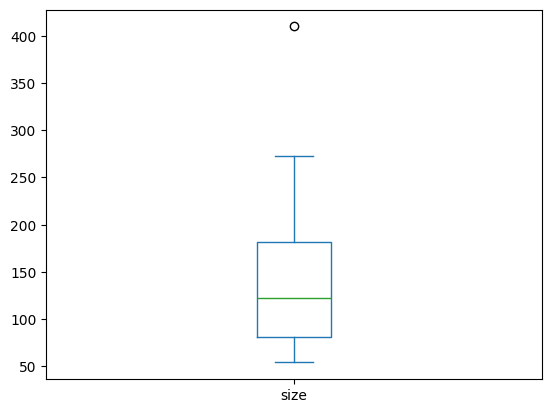

In [31]:
df['size'].plot(kind='box')

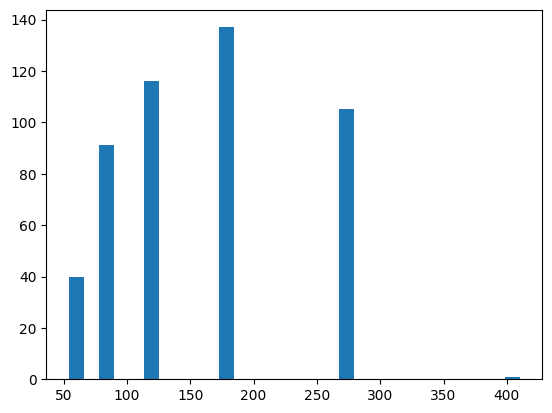

In [33]:
plt.hist(df['size'], bins = 30)
plt.show()

In [34]:
df_new = df[df['size']>60]

In [36]:
string = df_new['path'][0]

In [37]:
string

'./Module-2/data/crop/male_crop\\male_1.png'

In [38]:
def gender(string):
    try:
        return string.split('_')[0].split('/')[-1]
    except:
        return None

In [39]:
df['gender'] = df['path'].apply(gender)

In [40]:
df.head()

,path,size,gender
0,./Module-2/data/crop/male_crop\male_1.png,122,male
1,./Module-2/data/crop/male_crop\male_101.png,81,male
2,./Module-2/data/crop/male_crop\male_108.png,81,male
3,./Module-2/data/crop/male_crop\male_110.png,81,male
4,./Module-2/data/crop/male_crop\male_114.png,81,male


In [42]:
df.tail()

,path,size,gender
485,./Module-2/data/crop/female_crop\female_82.png,182,female
486,./Module-2/data/crop/female_crop\female_85.png,182,female
487,./Module-2/data/crop/female_crop\female_92.png,273,female
488,./Module-2/data/crop/female_crop\female_98.png,122,female
489,./Module-2/data/crop/female_crop\female_99.png,182,female


In [46]:
print(df['gender'].value_counts(normalize=True))

gender
female    0.510204
male      0.489796
Name: proportion, dtype: float64


<Axes: xlabel='gender'>

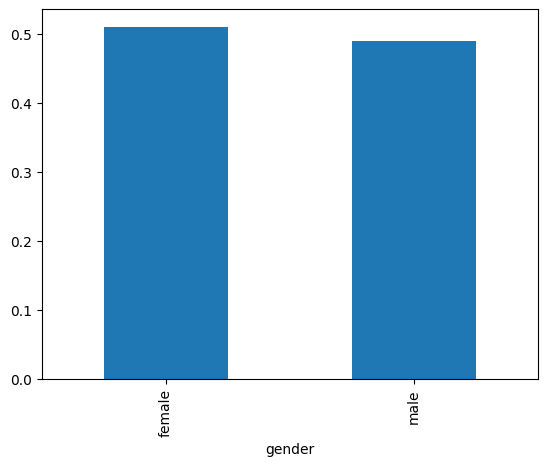

In [47]:
df['gender'].value_counts(normalize=True).plot(kind='bar')

In [49]:
def resize_img(path_to_resize):
    try: 
        img = cv2.imread(path_to_resize)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        size = gray.shape[0]
        
        if size >=100:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_AREA)
        else:
            gray_re = cv2.resize(gray, (100,100), cv2.INTER_CUBIC)
        return gray_re.flatten()
    except:
        return None
    

In [51]:
len(resize_img(path[0]))

10000

In [53]:
df_new['gender'] = df_new['path'].apply(gender)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2132\2870237434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['gender'] = df_new['path'].apply(gender)


In [54]:
df_new.head()

,path,size,gender
0,./Module-2/data/crop/male_crop\male_1.png,122,male
1,./Module-2/data/crop/male_crop\male_101.png,81,male
2,./Module-2/data/crop/male_crop\male_108.png,81,male
3,./Module-2/data/crop/male_crop\male_110.png,81,male
4,./Module-2/data/crop/male_crop\male_114.png,81,male


In [55]:
df_new['structure_data'] = df_new['path'].apply(resize_img)

C:\Users\Admin\AppData\Local\Temp\ipykernel_2132\2814634373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['structure_data'] = df_new['path'].apply(resize_img)


In [56]:
df_new.head()

,path,size,gender,structure_data
0,./Module-2/data/crop/male_crop\male_1.png,122,male,"[98, 104, 114, 121, 124, 135, 147, 154, 156, 1..."
1,./Module-2/data/crop/male_crop\male_101.png,81,male,"[20, 24, 27, 29, 29, 31, 21, 23, 29, 30, 16, 1..."
2,./Module-2/data/crop/male_crop\male_108.png,81,male,"[69, 63, 64, 69, 69, 55, 73, 77, 71, 63, 61, 6..."
3,./Module-2/data/crop/male_crop\male_110.png,81,male,"[136, 135, 134, 133, 132, 123, 130, 147, 147, ..."
4,./Module-2/data/crop/male_crop\male_114.png,81,male,"[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 7..."


In [58]:
df1 = df_new['structure_data'].apply(pd.Series)

In [59]:
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,98,104,114,121,124,135,147,154,156,154,...,132,135,139,146,151,152,148,145,147,148
1,20,24,27,29,29,31,21,23,29,30,...,38,32,25,22,32,25,19,20,32,48
2,69,63,64,69,69,55,73,77,71,63,...,184,183,183,184,184,187,188,189,190,189
3,136,135,134,133,132,123,130,147,147,113,...,107,109,110,112,116,113,111,109,110,112
4,75,75,75,75,75,75,75,75,75,75,...,70,68,66,61,50,52,64,67,61,50


In [60]:
df2 = pd.concat((df_new['gender'], df1), axis=1)

In [61]:
df2.head()

,gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,male,98,104,114,121,124,135,147,154,156,...,132,135,139,146,151,152,148,145,147,148
1,male,20,24,27,29,29,31,21,23,29,...,38,32,25,22,32,25,19,20,32,48
2,male,69,63,64,69,69,55,73,77,71,...,184,183,183,184,184,187,188,189,190,189
3,male,136,135,134,133,132,123,130,147,147,...,107,109,110,112,116,113,111,109,110,112
4,male,75,75,75,75,75,75,75,75,75,...,70,68,66,61,50,52,64,67,61,50


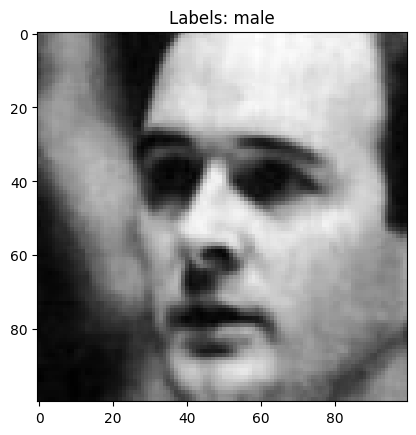

In [62]:
plt.imshow(df2.loc[0][1:].values.reshape(100,100).astype('int'), cmap='gray')
plt.title('Labels: ' + df2.loc[0]['gender'])
plt.show()

In [63]:
import pickle

In [64]:
pickle.dump(df2, open('./Module-2/data/dataframe_images_100_100.pickle', 'wb'))